In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Graphic card details

In [1]:
!nvidia-smi

Tue Apr 16 09:06:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0              29W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Installing yolov8

In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5563.1/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

# Preparing dataset

In [4]:
#Setup Gdrive file download extention 
!conda install -y gdown

Retrieving notices: ...working... done
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-5.1.0                |     pyhd8ed1ab_0          21 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          36 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.13.4-pyhd8ed1a

In [5]:
# !gdown --id <File ID>
!gdown --id 1qBKw7cO44Av9fKUgY4qG6hP_iCGMfXYa

/opt/conda/lib/python3.10/site-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qBKw7cO44Av9fKUgY4qG6hP_iCGMfXYa
From (redirected): https://drive.google.com/uc?id=1qBKw7cO44Av9fKUgY4qG6hP_iCGMfXYa&confirm=t&uuid=f45f8e59-1bda-421c-9574-3cfeeae29622
To: /kaggle/working/yolov8.zip
100%|███████████████████████████████████████| 95.8M/95.8M [00:00<00:00, 115MB/s]


In [6]:
import zipfile
with zipfile.ZipFile('/kaggle/working/yolov8.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/')

# Training

In [7]:
import os
os.getcwd()

'/kaggle/working'

In [8]:
!ls

yolov8	yolov8.zip


In [29]:
!yolo task=detect mode=train model=yolov8s.pt batch = 8 data= /kaggle/working/yolov8/data.yaml epochs=500 imgsz=640 plots=True

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/yolov8/data.yaml, epochs=500, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [10]:
import pandas as pd

In [30]:
df = pd.read_csv("/kaggle/working/runs/detect/train2/results.csv")
df

epoch        train/box_loss        train/cls_loss  \
0                       1                3.9747              18.53600   
1                       2                3.1197              12.27200   
2                       3                3.8981               8.79850   
3                       4                2.2136               6.89150   
4                       5                3.0697               4.20410   
..                    ...                   ...                   ...   
245                   246                1.7781               0.82156   
246                   247                1.6705               0.86657   
247                   248                1.9262               0.85742   
248                   249                1.6990               0.76749   
249                   250                1.6005               0.73704   

           train/dfl_loss  metrics/precision(B)     metrics/recall(B)  \
0                 1.63000               0.73068               0.11534   
1                 1.34690               0.00278               0.12500   
2                 1.52170               0.00065               0.12500   
3                 0.94320               0.59581               0.16667   
4                 1.24200               0.45023               0.26499   
..                    ...                   ...                   ...   
245               0.83073               0.37962               0.40585   
246               0.85175               0.66741               0.50731   
247               0.84542               0.66741               0.50731   
248               0.85401               0.67663               0.57842   
249               0.83938               0.67663               0.57842   

         metrics/mAP50(B)   metrics/mAP50-95(B)          val/box_loss  \
0                 0.06234               0.03725                2.7668   
1                 0.01608               0.01116                2.6869   
2                 0.00048               0.00034                2.7433   
3                 0.09012               0.03055                2.6382   
4                 0.29497               0.09393                2.6573   
..                    ...                   ...                   ...   
245               0.31488               0.10801                2.6566   
246               0.45336               0.14058                2.7217   
247               0.45336               0.14058                2.7217   
248               0.65835               0.18598                2.6574   
249               0.65835               0.18598                2.6574   

             val/cls_loss          val/dfl_loss                lr/pg0  \
0                  4.9586               0.98730              0.000050   
1                  4.9978               0.96894              0.000116   
2                  4.7931               0.99412              0.000183   
3                  3.2687               0.97890              0.000249   
4                  2.6021               1.04120              0.000314   
..                    ...                   ...                   ...   
245                1.8475               1.01460              0.000858   
246                1.9283               1.01820              0.000855   
247                1.9283               1.01820              0.000852   
248                1.8990               1.00340              0.000848   
249                1.8990               1.00340              0.000845   

                   lr/pg1                lr/pg2  
0                0.000050              0.000050  
1                0.000116              0.000116  
2                0.000183              0.000183  
3                0.000249              0.000249  
4                0.000314              0.000314  
..                    ...                   ...  
245              0.000858              0.000858  
246              0.000855              0.000855  
247              0.000852              0.000852  
248         

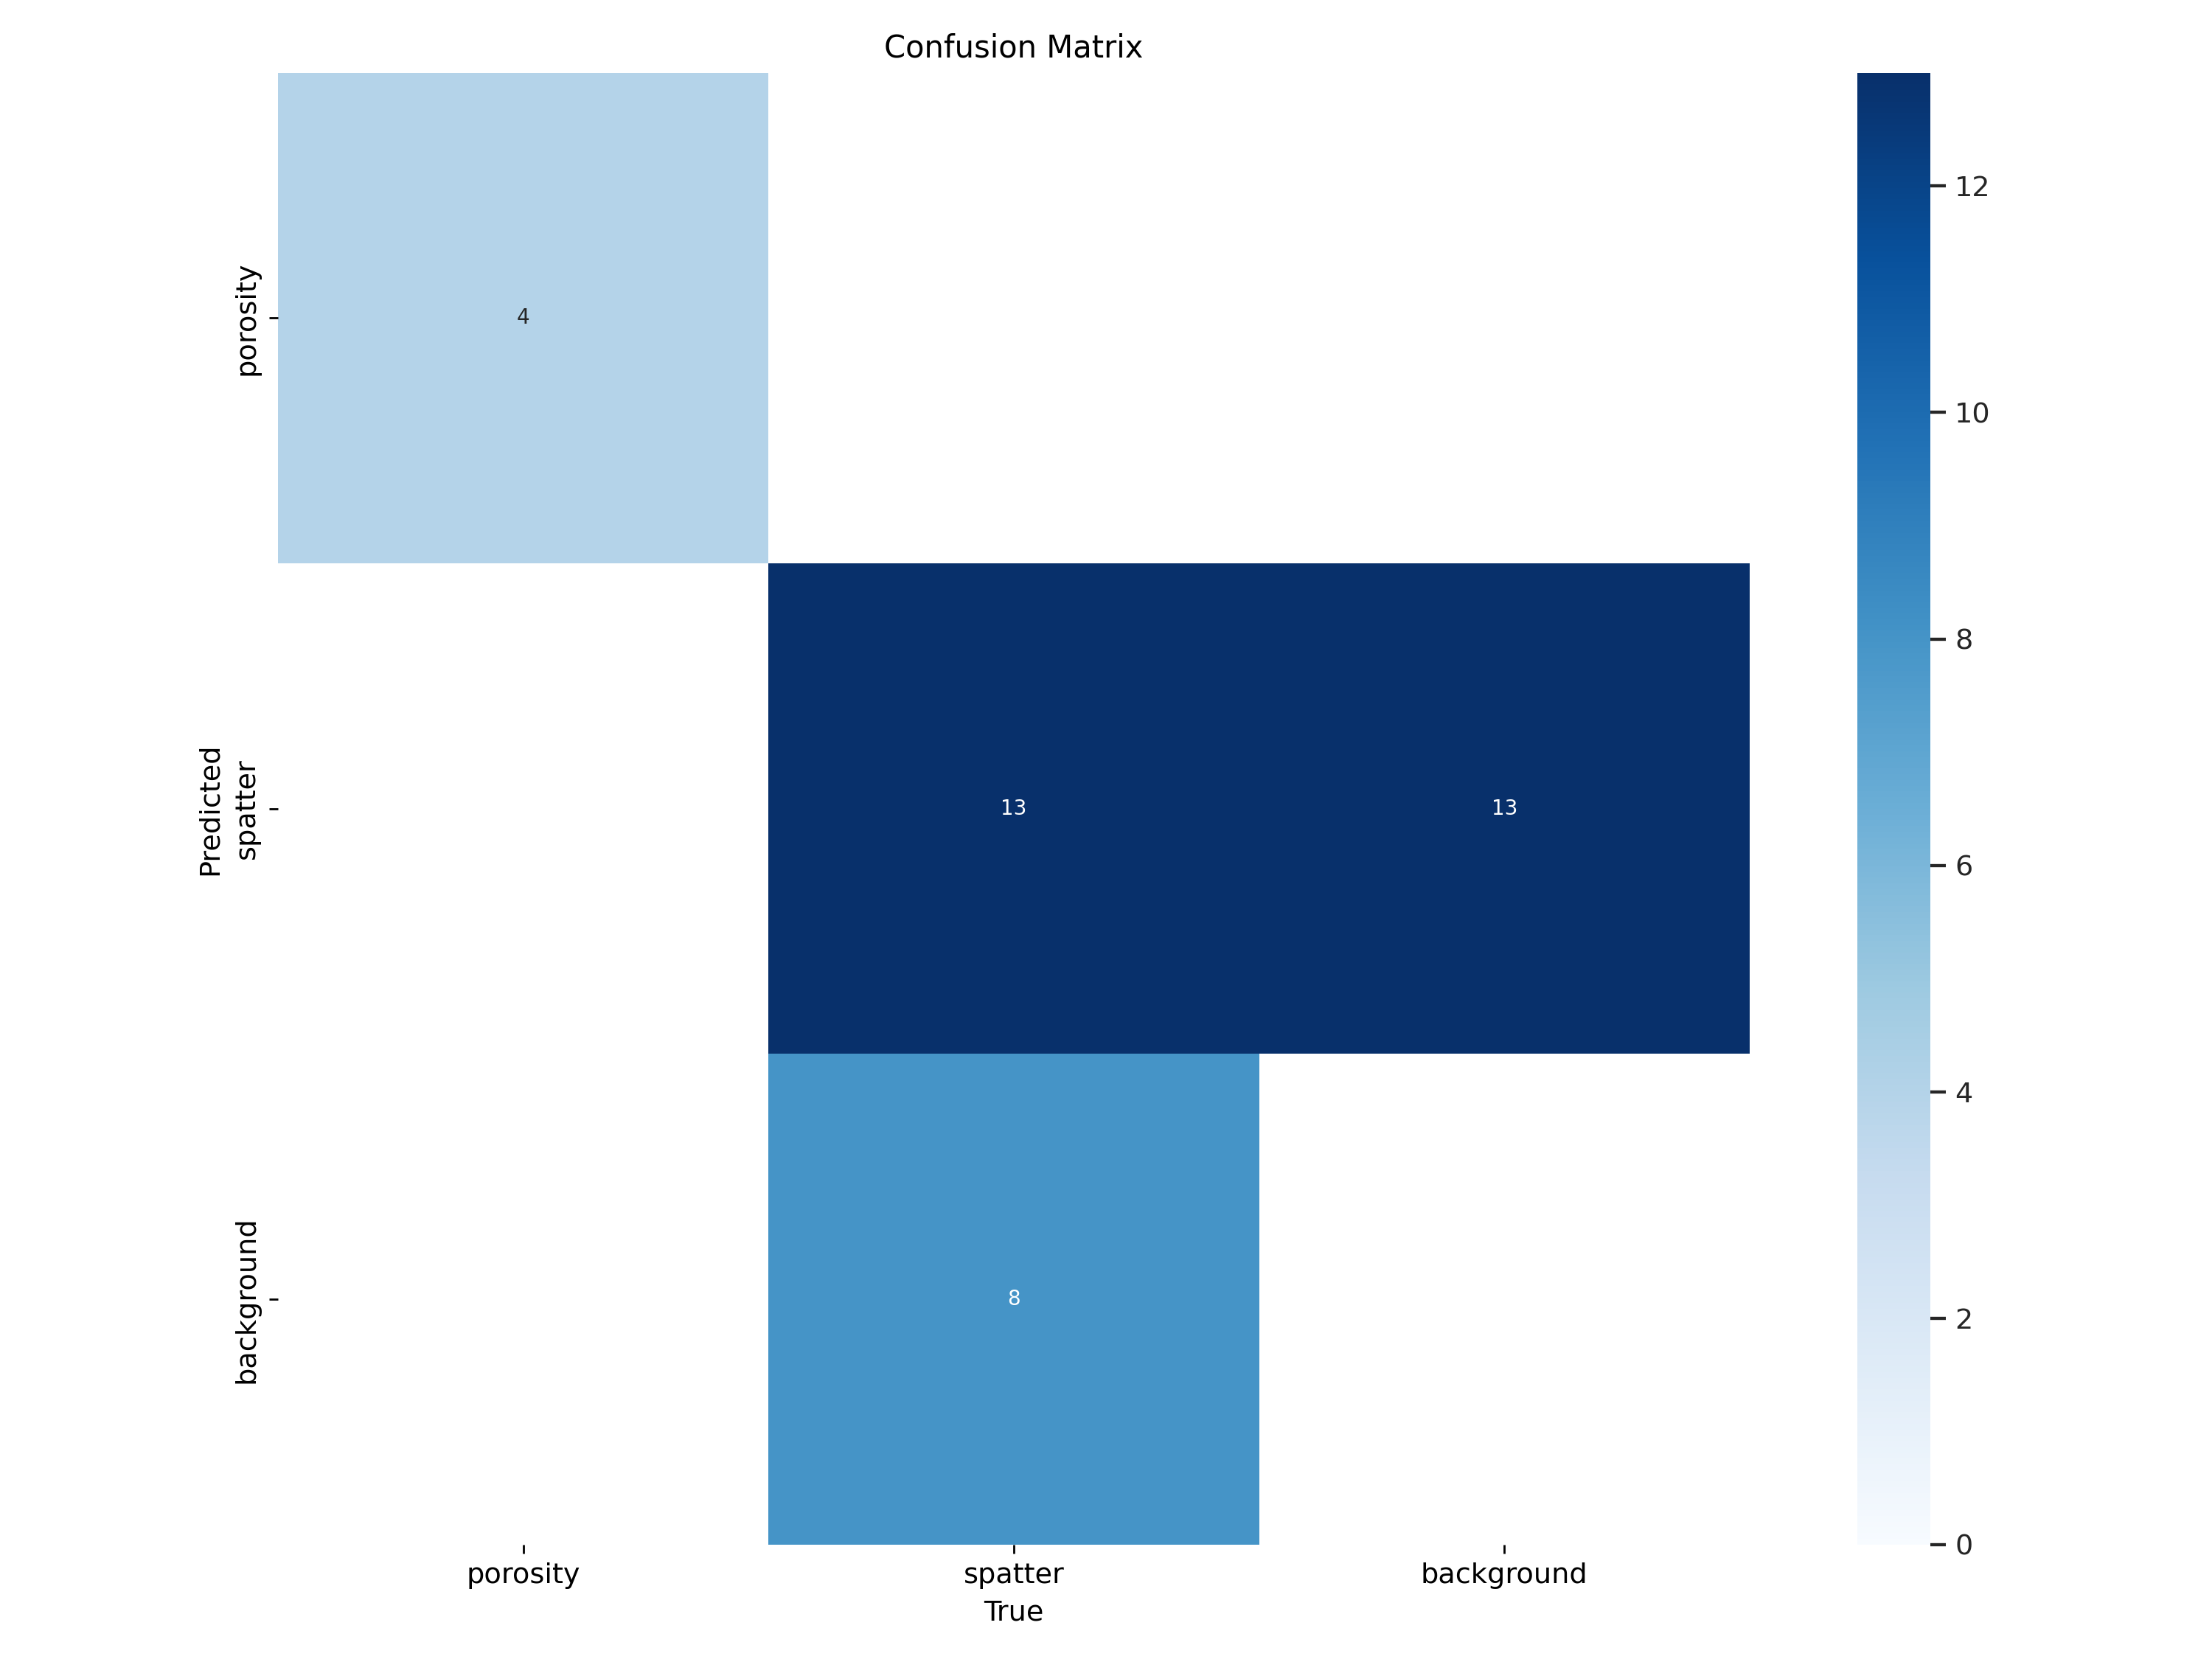

In [31]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

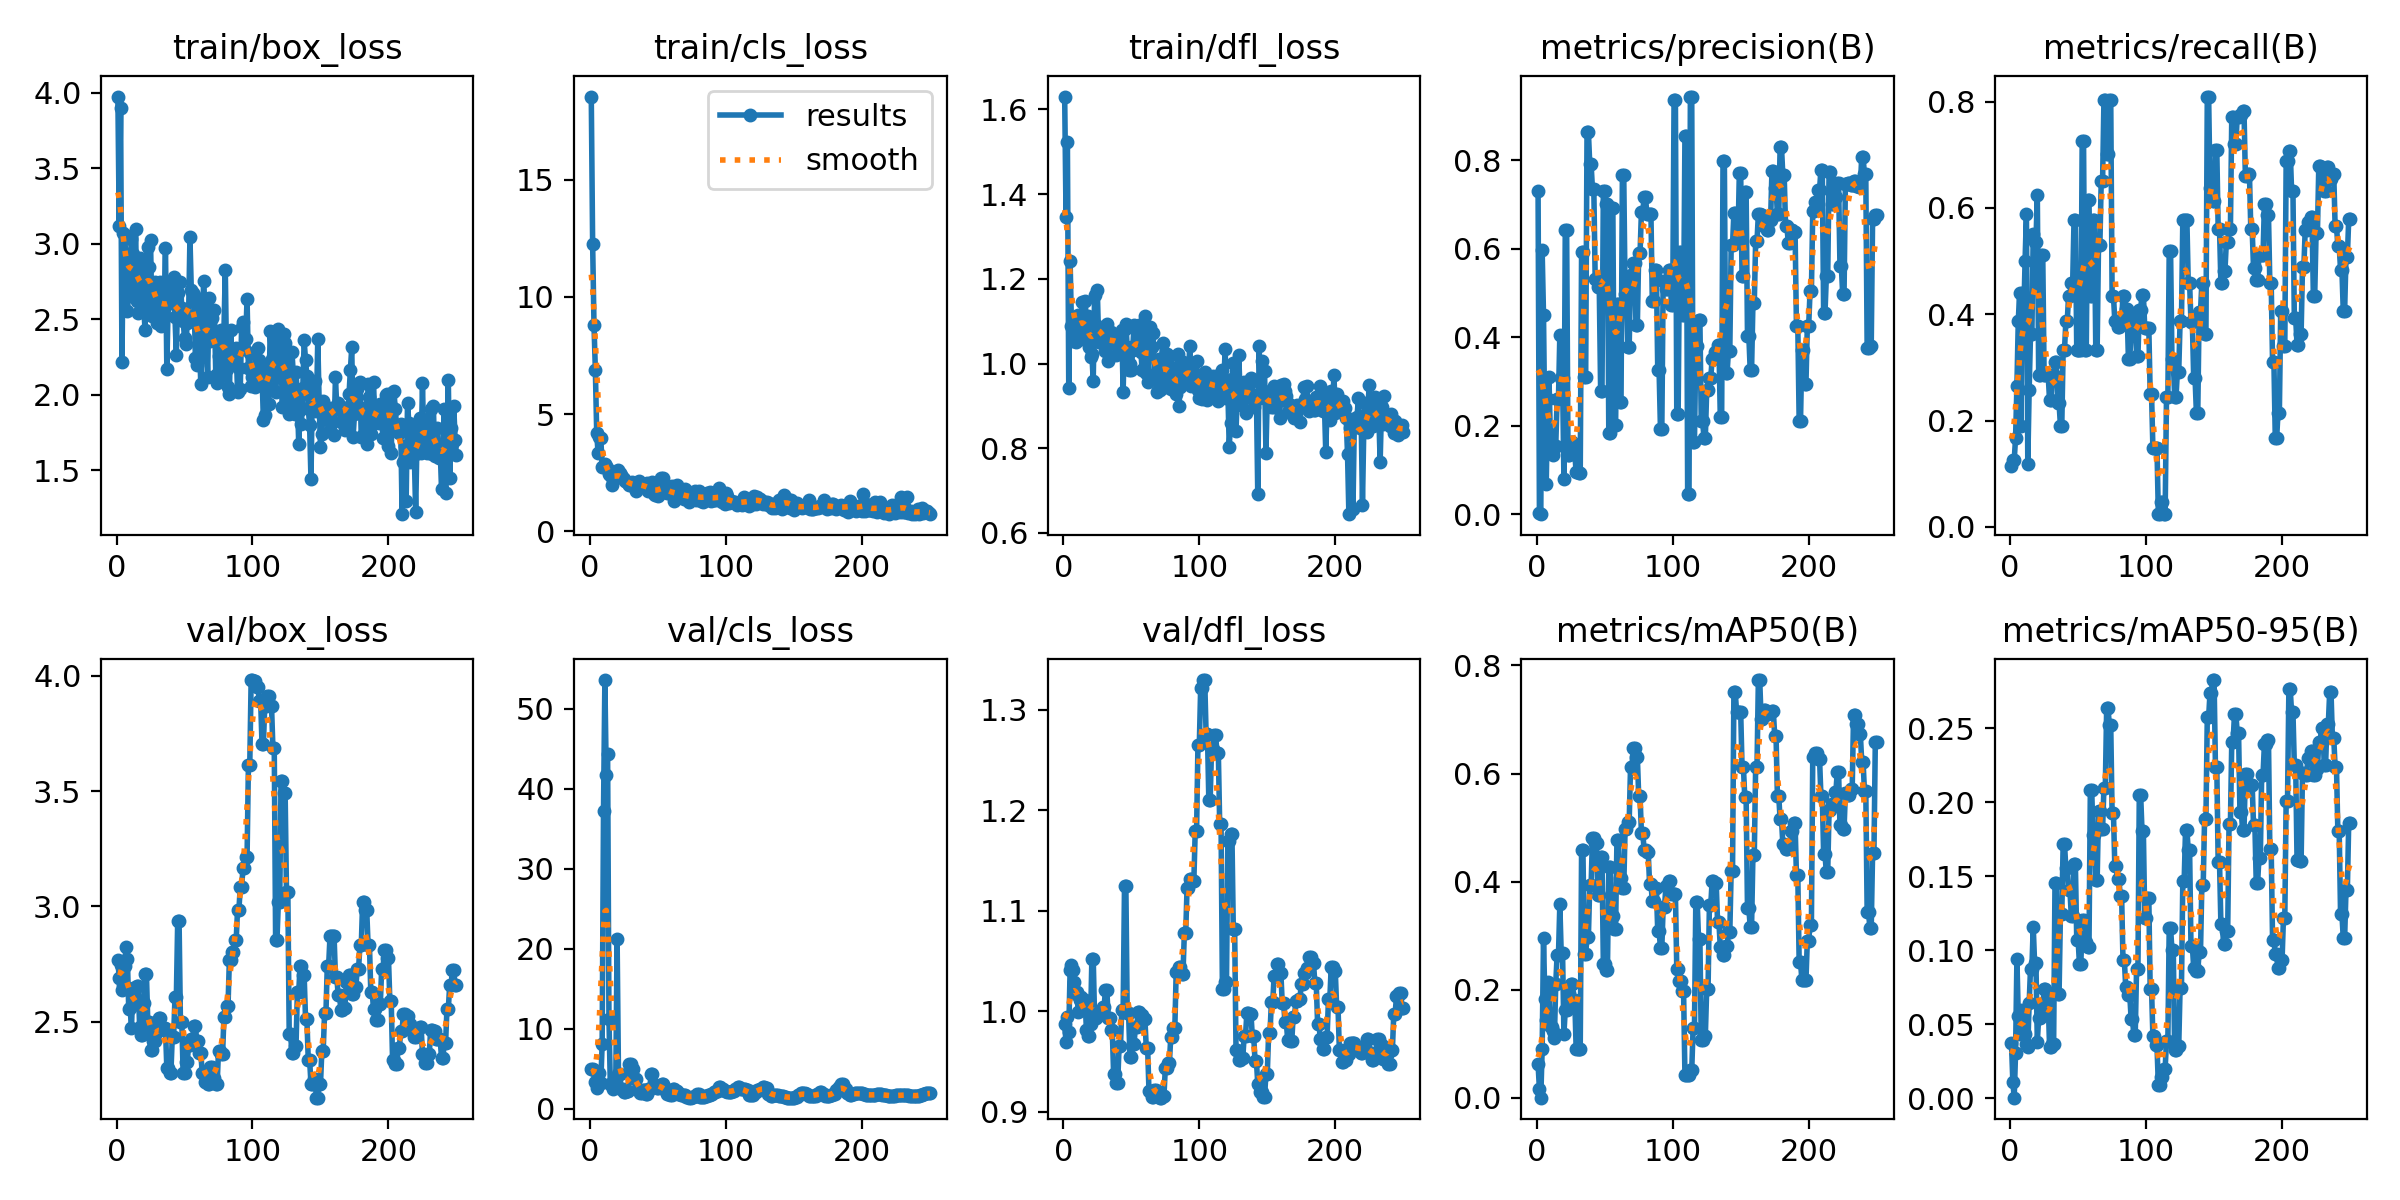

In [32]:
Image(filename='runs/detect/train2/results.png', width=800)

# Validate the model

In [34]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data= /kaggle/working/yolov8/data.yaml

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/yolov8/validation/labels.cache... 3 images, 0 back
val: WARNING ⚠️ /kaggle/working/yolov8/validation/images/20230915_131702.jpg: corrupt JPEG restored and saved
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          3         25      0.772      0.613      0.711      0.289
              porosity          3          4       0.97       0.75      0.845      0.345
               spatter          3         21      0.573      0.476      0.576      0.234
Speed: 1.3ms preprocess, 84.9ms inference, 0.0ms loss, 755.8ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with model

In [35]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.1 source= /kaggle/working/yolov8/test

Ultralytics YOLOv8.1.47 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /kaggle/working/yolov8/test/20230915_131308.jpg: 320x640 52 spatters, 84.8ms
image 2/2 /kaggle/working/yolov8/test/IMG_20230919_110710.jpg: 320x640 5 porositys, 7.8ms
Speed: 3.9ms preprocess, 46.3ms inference, 847.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


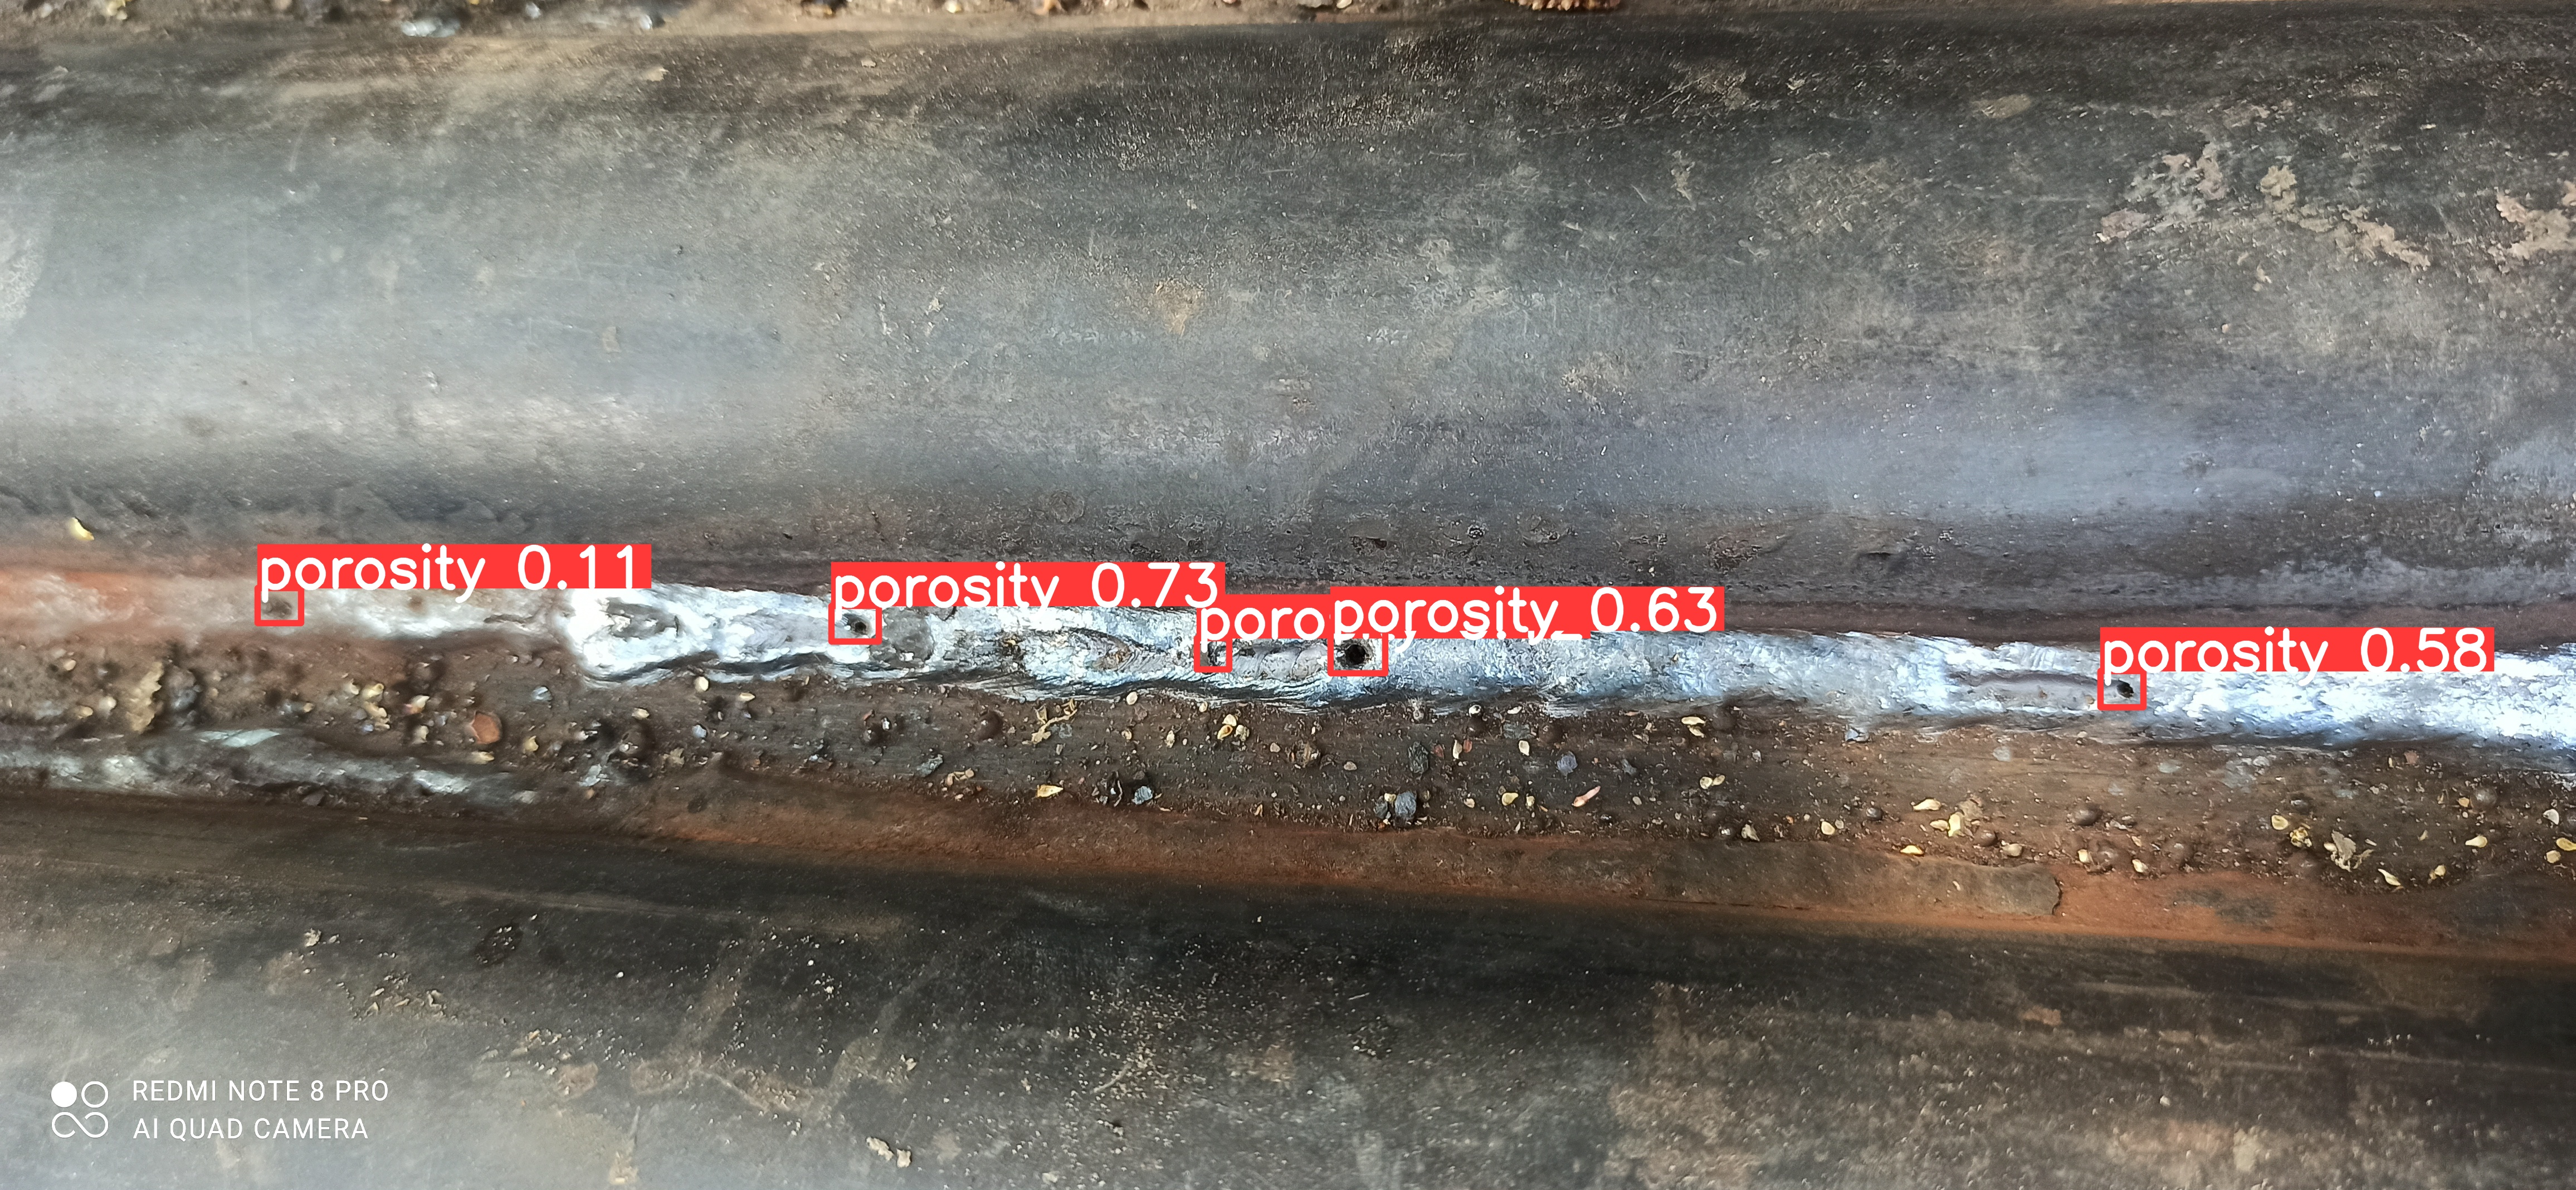

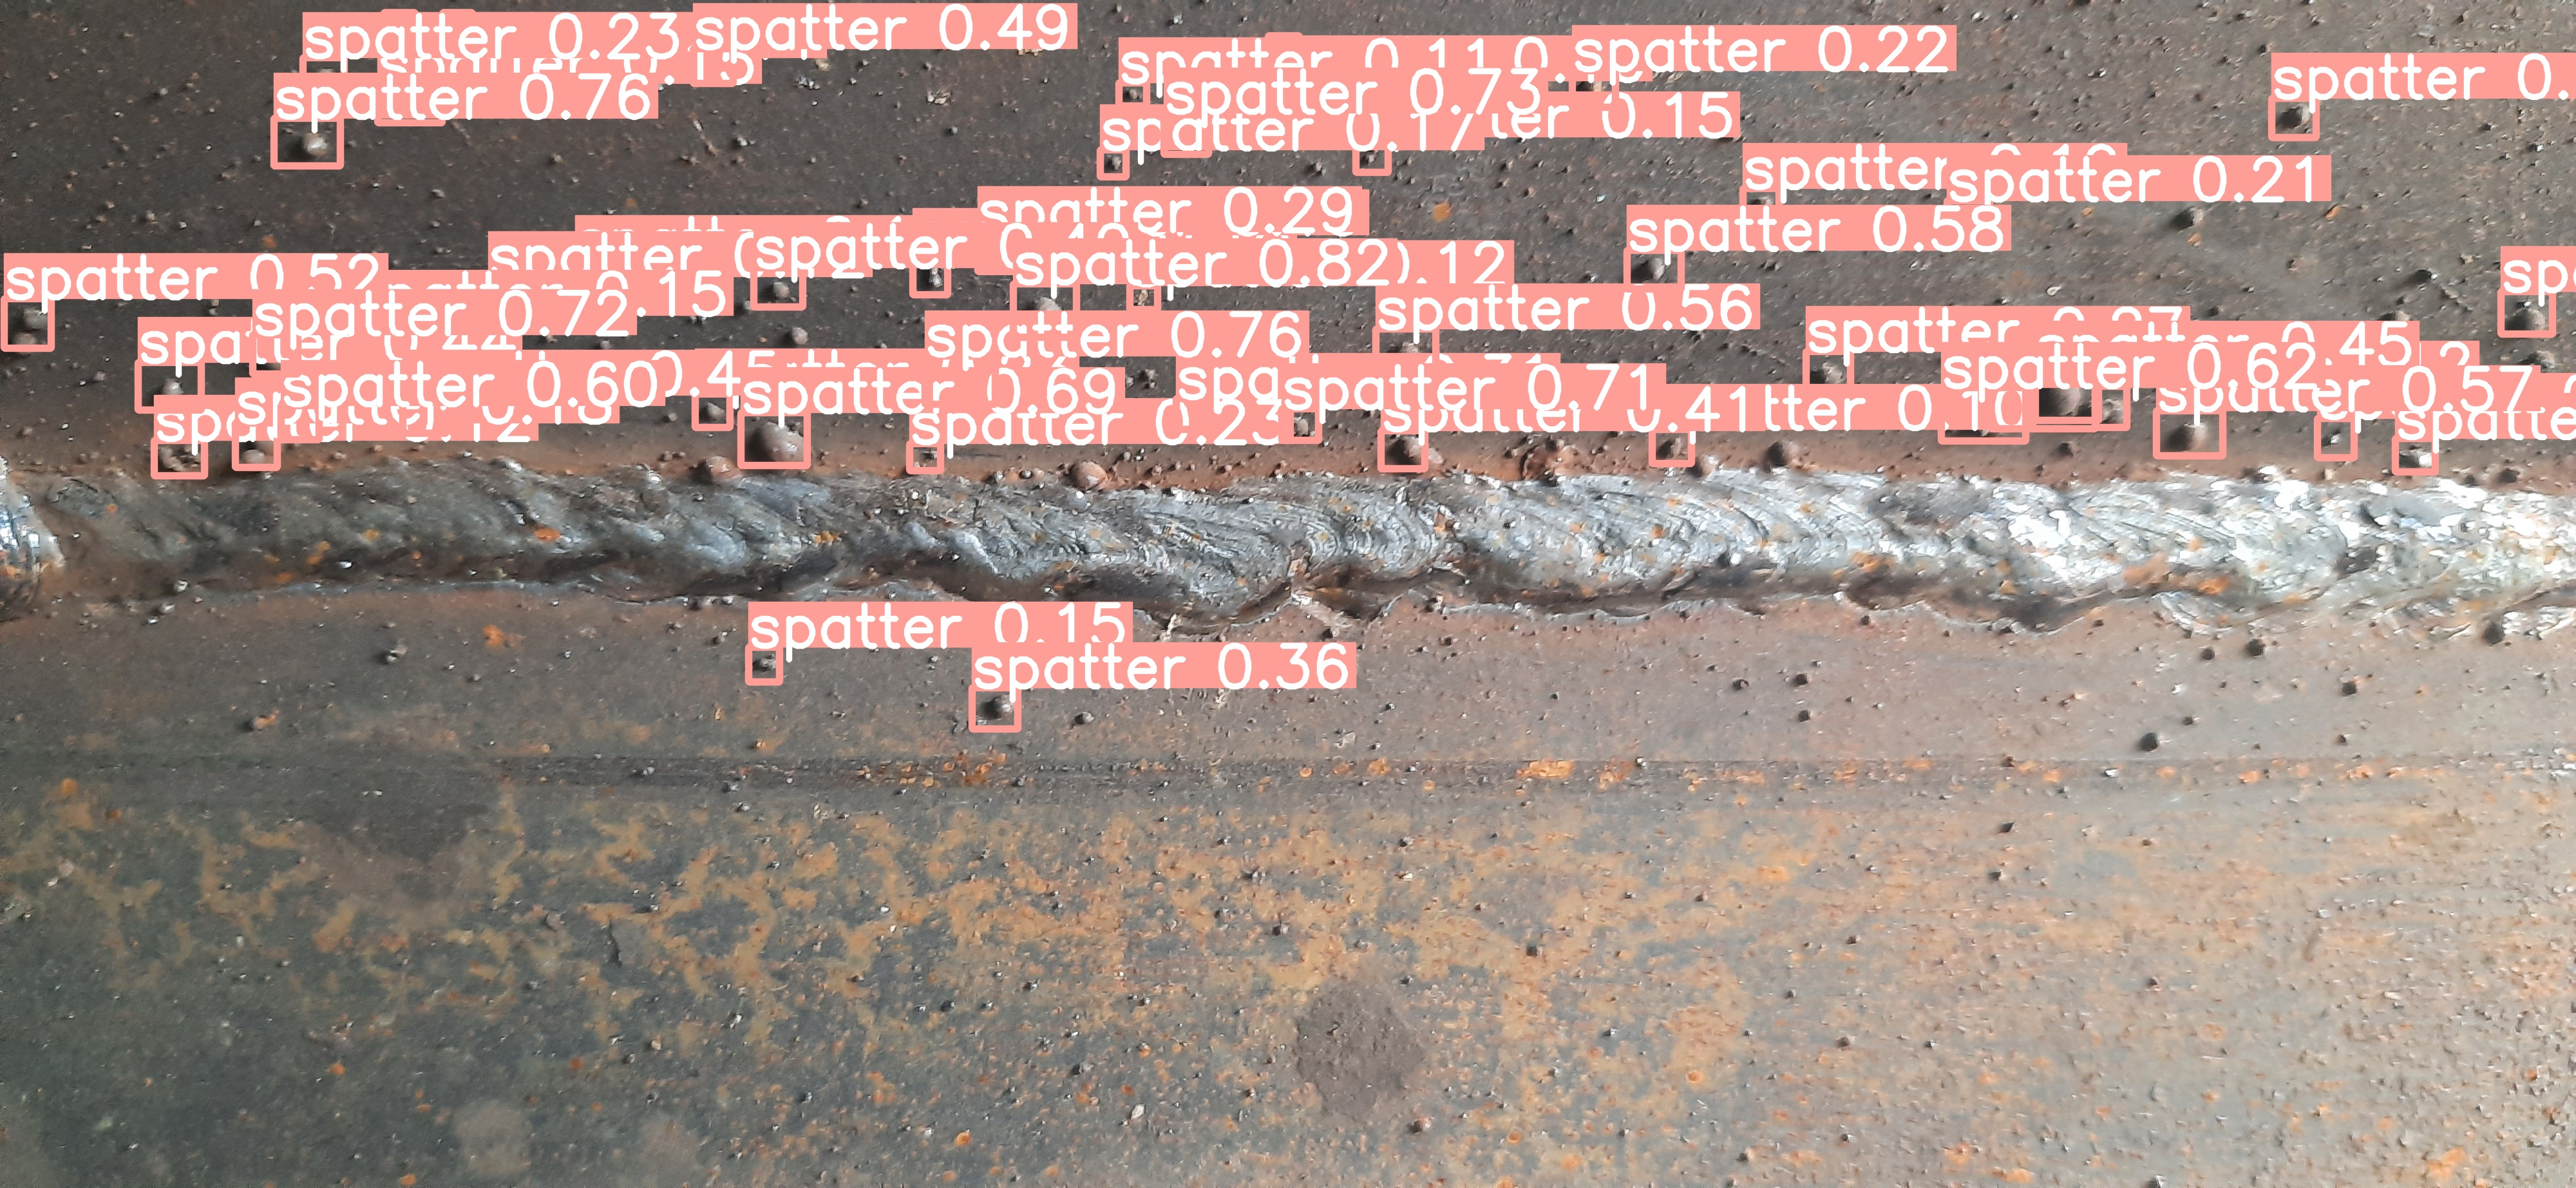

In [36]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict5/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Downloading the runs folder

In [37]:
import shutil
shutil.make_archive("yolov8_result", 'zip', "/kaggle/working/runs")

'/kaggle/working/yolov8_result.zip'